In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [162]:
review=pd.read_excel("C:/Users/gaura/OneDrive/Desktop/Data Science/Assignments/5. Bank Reviews-Complaints Analysis/BankReviews.xlsx")

In [163]:
review.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [164]:
review["Reviews"]

0      Great job, Wyndham Capital! Each person was pr...
1      Matthew Richardson is professional and helpful...
2      We had a past experience with Wyndham Mortgage...
3      We have been dealing with Brad Thomka from the...
4      I can't express how grateful I am for the supp...
                             ...                        
500    \r\nI never write reviews but had to this time...
501    \r\nIt all started when Bob G ran a credit che...
502    \r\nWhat a horrible experience. We have excell...
503    \r\nRep was extremely professional, friendly, ...
504    \r\nI was working with a loan consultant from ...
Name: Reviews, Length: 505, dtype: object

In [165]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      505 non-null    datetime64[ns]
 1   Stars     505 non-null    int64         
 2   Reviews   505 non-null    object        
 3   BankName  505 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [166]:
review.isnull().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

In [167]:
review['Stars'].value_counts()


5    410
1     95
Name: Stars, dtype: int64

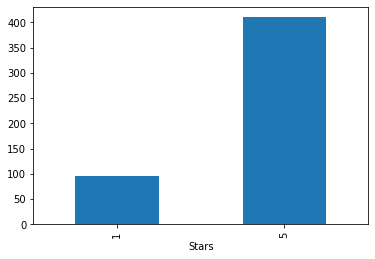

In [168]:
# Graphical Representation
review.groupby('Stars')['Reviews'].count().plot(kind='bar')
plt.show()

In [169]:
len(review["Reviews"])

505

In [170]:
x = review['Reviews']

In [171]:
x

0      Great job, Wyndham Capital! Each person was pr...
1      Matthew Richardson is professional and helpful...
2      We had a past experience with Wyndham Mortgage...
3      We have been dealing with Brad Thomka from the...
4      I can't express how grateful I am for the supp...
                             ...                        
500    \r\nI never write reviews but had to this time...
501    \r\nIt all started when Bob G ran a credit che...
502    \r\nWhat a horrible experience. We have excell...
503    \r\nRep was extremely professional, friendly, ...
504    \r\nI was working with a loan consultant from ...
Name: Reviews, Length: 505, dtype: object

In [172]:
y=review['Stars']

In [180]:
y

0      5
1      5
2      5
3      5
4      5
      ..
500    1
501    1
502    1
503    1
504    1
Name: Stars, Length: 505, dtype: int64

#### Calculating Sentiment analysis using Textblob module

In [112]:
from textblob import TextBlob

In [108]:
review['sentiment'] = review["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [109]:
# Positive Reviews Percentage
Positive=(review['sentiment']>0).sum()
(Positive/len(review["Reviews"]))*100

92.27722772277228

In [110]:
# Neagtive Reviews Percentage
Negative=(review['sentiment']<0).sum()
(Negative/len(review["Reviews"]))*100

6.9306930693069315

In [111]:
# Neutral Reviews Percentage
Neutral=(review['sentiment']==0).sum()
(Neutral/len(review["Reviews"]))*100

0.7920792079207921

In [115]:
# creating dictionary which will contain both the review and the sentiment of the review
final_dictionary = []
for text in x:
    dictionary_sentiment = {}
    dictionary_sentiment['Review'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(text)
    final_dictionary.append(dictionary_sentiment)
print(final_dictionary[:2])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}]


In [116]:
# Finding positive reviews
positive_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Positive':
        positive_reviews.append(review)
print(positive_reviews[:2])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}]


In [65]:
# Finding neutral reviews
neutral_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Neutral':
        neutral_reviews.append(review)
print(neutral_reviews[:2])

[{'Review': '\r\nPerson with whom I spoke kept interrupting me and telling me his "line" rather than listening to what info I wanted. Quite pushy, altho\' he said he wasn\'t a salesman. Closing costs were astronomical.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': '\r\nThe rate re-lock-in rule was not followed.\r\n        ', 'Sentiment': 'Neutral'}]


In [66]:
# Finding negative reviews
negative_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Negative':
        negative_reviews.append(review)
print(negative_reviews[:2])

[{'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to send 3 a

In [157]:
# counting number of positive,neutral and negative reviews
reviews_count = pd.DataFrame([len(positive_reviews),len(neutral_reviews),len(negative_reviews)],index=['Positive','Neutral','Negative'])

In [158]:
reviews_count

,0
Positive,466
Neutral,4
Negative,35


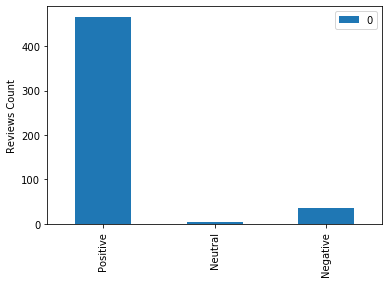

In [120]:
reviews_count.plot(kind='bar')
plt.ylabel('Reviews Count')   
plt.show()

In [121]:
# printing first five positive reviews
i=1
for review in positive_reviews[:5]:
        print(i)
        print(review['Review'])
        print('******************************************************')
        i+=1

1
Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!
******************************************************
2
Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!
******************************************************
3
We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindR

In [92]:
# printing first five negative reviews
i=1
for review in negative_reviews[:5]:
        print(i)
        print(review['Review'])
        print('******************************************************')
        i+=1

1
We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind
******************************************************
2
This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to se

#### Data Preprocessing

In [122]:
#Abbrevations and Words correction
import re
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [123]:
# applying clean_text function defined above to remove punctuation, strip extra spaces and convert each word to lowercase
X = x.apply(lambda y: clean_text(y))

In [124]:
X.head()

0    great job wyndham capital each person was prof...
1    matthew richardson is professional and helpful...
2    we had a past experience with wyndham mortgage...
3    we have been dealing with brad thomka from the...
4    i cant express how grateful i am for the suppo...
Name: Reviews, dtype: object

#### Stop words

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
tokens_vect = CountVectorizer(stop_words='english')

#### Lemmatization

In [126]:
from nltk.stem import WordNetLemmatizer
# sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(X)):
    words = nltk.word_tokenize(X[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    X[i] = ' '.join(words)
words    

['i',
 'wa',
 'working',
 'with',
 'a',
 'loan',
 'consultant',
 'from',
 'nasb',
 'and',
 'she',
 'told',
 'me',
 'that',
 'she',
 'would',
 'give',
 'me',
 'a',
 'rate',
 'of',
 '%',
 'for',
 'a',
 'year',
 'fixed',
 'loan',
 'with',
 'a',
 'total',
 'closing',
 'cost',
 'of',
 '$',
 'i',
 'asked',
 'her',
 'to',
 'send',
 'me',
 'the',
 'good',
 'faith',
 'estimate',
 'the',
 'good',
 'faith',
 'estimate',
 'came',
 'with',
 'a',
 'total',
 'closing',
 'cost',
 'of',
 '$',
 'which',
 'is',
 'about',
 '$',
 'more',
 'than',
 'she',
 'mentioned',
 'during',
 'our',
 'conversation',
 'when',
 'i',
 'called',
 'her',
 'for',
 'explanation',
 'of',
 'the',
 'extra',
 '$',
 'she',
 'said',
 'that',
 'there',
 'is',
 'a',
 'state',
 'tax',
 'which',
 'she',
 'wa',
 'not',
 'aware',
 'of',
 'what',
 'an',
 'explanation',
 'she',
 'knew',
 'my',
 'state',
 'from',
 'the',
 'beginning',
 'and',
 'i',
 'repeatedly',
 'asked',
 'her',
 'for',
 'a',
 'total',
 'closing',
 'cost',
 'and',
 'that'

In [127]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

In [186]:
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))
XX = vectorizer.fit_transform(X).toarray()

In [187]:
XX

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33235751,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12269204, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11566422, 0.08405796,
        0.12686645]])

In [128]:
tokens_vect = CountVectorizer(stop_words='english')

In [129]:
token_dtm = tokens_vect.fit_transform(X)

In [130]:
tokens_vect.get_feature_names()

['aaron',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquire',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addedconsolidationit',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'adjust',
 'adjusted',
 'admin',
 'admiration',
 'advertise',
 'advice',
 'advised',
 'advocated',
 'afford',
 'agai',
 'age',
 'agent',
 'aggravating',
 'aggravation',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'airfare',
 'airline',
 'alerted',
 'alex',
 'alievatied',
 'alina',
 'allow',
 'allowed',
 'alpine',
 'altho',
 'alves',
 'amazing',
 'amd',
 'american',
 'amerisave',
 'amortgage',
 'andd',
 'anderson',
 'andor',
 'andrea',
 'andrew',
 'andy',
 'angelica',
 'ann',
 'annoyed',


In [131]:
token_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [132]:
token_dtm.toarray().shape

(505, 2255)

In [133]:
pd.DataFrame(token_dtm.toarray(),columns = tokens_vect.get_feature_names())

,aaron,ability,able,absoltely,absolute,absolutely,accept,acceptable,accepted,access,...,wyndum,xx,year,yelp,yep,yes,youi,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0,0,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
501,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# creating a dataframe which shows the count of how many times a word is coming in the corpus
count_dtm_dataframe = pd.DataFrame(np.sum(token_dtm.toarray(),axis=0),tokens_vect.get_feature_names()).reset_index()
count_dtm_dataframe.columns =['Word','Count']
count_dtm_dataframe

,Word,Count
0,aaron,23
1,ability,5
2,able,47
3,absoltely,2
4,absolute,1
...,...,...
2250,yes,3
2251,youi,1
2252,zach,2
2253,zelada,1


#### Cleaning text of stopwords

In [135]:
#adding sentiment column which shows sentiment polarity of each word
sentiment_word = []
for word in count_dtm_dataframe['Word']:
    sentiment_word.append(sentiment_review(word))
count_dtm_dataframe['Sentiment'] = sentiment_word

In [136]:
count_dtm_dataframe.head()

,Word,Count,Sentiment
0,aaron,23,Neutral
1,ability,5,Neutral
2,able,47,Positive
3,absoltely,2,Neutral
4,absolute,1,Positive


In [137]:
# separating positive words
positive_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Positive',:].sort_values('Count',ascending=False)

In [138]:
positive_words_df.head(20)

,Word,Count,Sentiment
887,great,139,Positive
207,best,99,Positive
1552,professional,71,Positive
629,easy,65,Positive
956,highly,64,Positive
2027,thanks,61,Positive
1981,sure,51,Positive
2,able,47,Positive
874,good,43,Positive
1592,quick,37,Positive


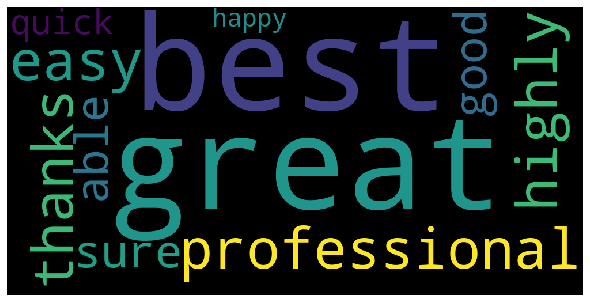

In [143]:
# plotting word cloud of 10 most frequently used positive words
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [144]:
# separating negative words
negative_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Negative',:].sort_values('Count',ascending=False)

In [145]:
negative_words_df.head(10)

,Word,Count,Sentiment
351,closed,68,Negative
735,extremely,46,Negative
923,hard,40,Negative
1503,poor,32,Negative
395,complicated,18,Negative
1198,little,15,Negative
1531,previous,13,Negative
1442,past,13,Negative
708,expected,11,Negative
1909,spent,11,Negative


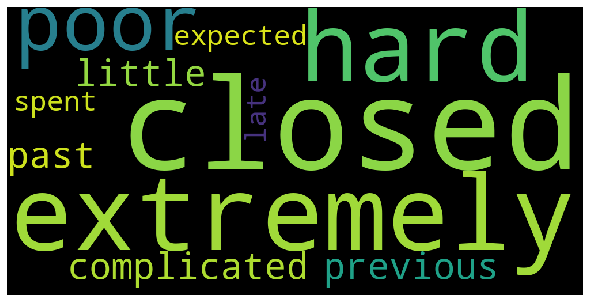

In [146]:
# plotting word cloud of 10 most frequently used positive words
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#### Modelling

In [188]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(XX,y,random_state = 123, test_size = 0.2)

In [189]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(404, 138)
(101, 138)
(404,)
(101,)


In [193]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_Y )

LogisticRegression()

In [195]:
#Evelution of train and test accuracy
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_Y,logreg.predict(test_X))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_Y,logreg.predict(train_X))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.8910891089108911
train_accuracy:  0.9207920792079208


C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 5] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

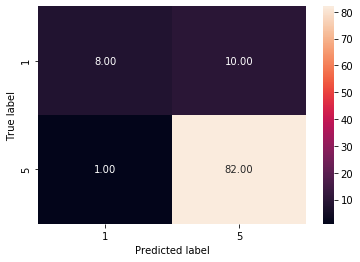

In [197]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_Y,
                            logreg.predict(test_X), [1,5] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')